In [1]:
#Importing important libraries...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as ph
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing Dataframe using pandas
data = pd.read_csv('athlete_events.csv')

In [3]:
#Now taking Some information about the data
data.info()
#It seems that there are some missing data in Age,Height,Weight,Medal we need to feel it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#We can see there are lot of NULL value in some of the feature..Lets try to fill it
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


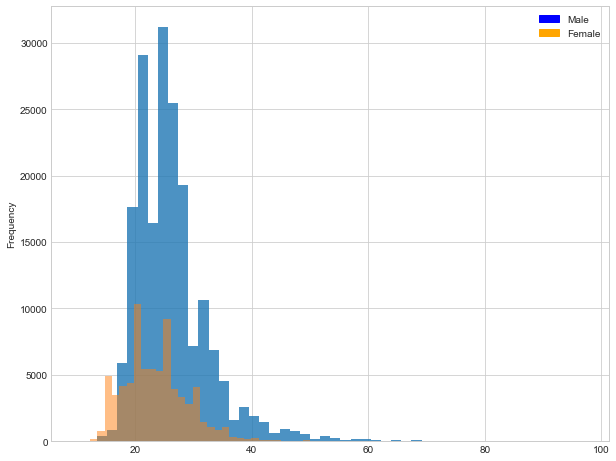

In [6]:
#Now trying to Analyize Age column ;-)
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
data[data['Sex']=='M']['Age'].plot(kind='hist',alpha=.8,bins=50)
data[data['Sex']=='F']['Age'].plot(kind='hist',alpha=.5,bins=50)
lg1 = ph.Patch(label='Male',color='blue')
lg2 = ph.Patch(label='Female',color='orange')
plt.legend(handles=[lg1,lg2])

Here we can see that male participate more than females,So to fill NULL values in age column we will fill male ages
with 25 and female age with 23 as indicated by histogram that most of them have age near range of 22-25...

In [7]:
#function to fill the NULL values of the Age column of the sportsperson
def age_check(value):
    age = value[0]
    sex = value[1]
    if sex=='M'and pd.isnull(age):
        age=25
    if sex=='F'and pd.isnull(age):
        age=23
    return age
data['Age'] = data[['Age','Sex']].apply(age_check,axis=1)

In [8]:
#Just a Check
data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

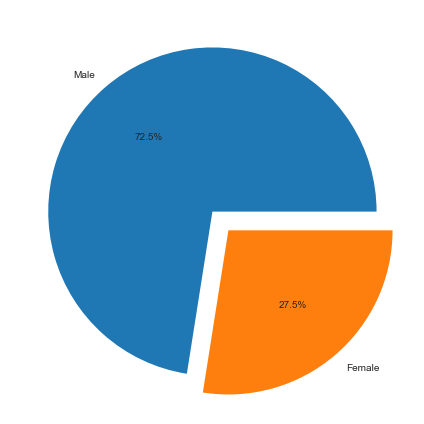

In [9]:
#Now lets us see what is the percentage of male and female in olympics
plt.figure(figsize=(6,6))
#lg1 = ph.Patch(color='blue',label='Male')
#lg2 = ph.Patch(color='orange',label='Female')                              ##Static code without plotly for pie chart
#plt.legend(handles=[lg1,lg2],loc=1)
plt.pie(x=data['Sex'].value_counts(),autopct='%1.1f%%',explode=(0,0.15),labels=['Male','Female'])
plt.tight_layout()

Hmmm..Number of male are lot grater than no fo female..

In [10]:
#Now finding the median of Weight and height on the basis of country and trying to fill the NULL values of Weight and Height on basis of country
Weight = data.groupby('NOC')['Weight'].median()
Height = data.groupby('NOC')['Height'].median()

In [11]:
#function to fill in NULL values of Height feature
def Height_check(value):
    height = value[0]
    noc = value[1]
    if pd.isnull(Height.loc[noc]):
        height = data['Height'].median()
    if pd.isnull(height):
        height = Height.loc[noc]
    return height

In [12]:
data['Height'] = data[['Height','NOC']].apply(Height_check,axis=1)

In [13]:
#Function to fill the NULL values of Weight feature
def Weight_check(value):
    weight = value[0]
    noc = value[1]
    if pd.isnull(Weight.loc[noc]):
        weight = data['Weight'].median()
    if pd.isnull(weight):
        weight = Weight.loc[noc]
    return weight

In [14]:
data['Weight'] = data[['Weight','NOC']].apply(Weight_check,axis=1)

In [15]:
#Just a check..
data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [16]:
#Now let use fill the NULL value to medal field here NULL means no medal has been won by the particular person in particular sport.
data['Medal'] = data['Medal'].apply(lambda x:'Lost' if pd.isnull(x) else x)

In [17]:
#Just a check...
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

OKAY DUDE We have removed all NULL value succesfully.

In [18]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Lost
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Lost
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Lost
3,4,Edgar Lindenau Aabye,M,34.0,180.0,73.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Lost


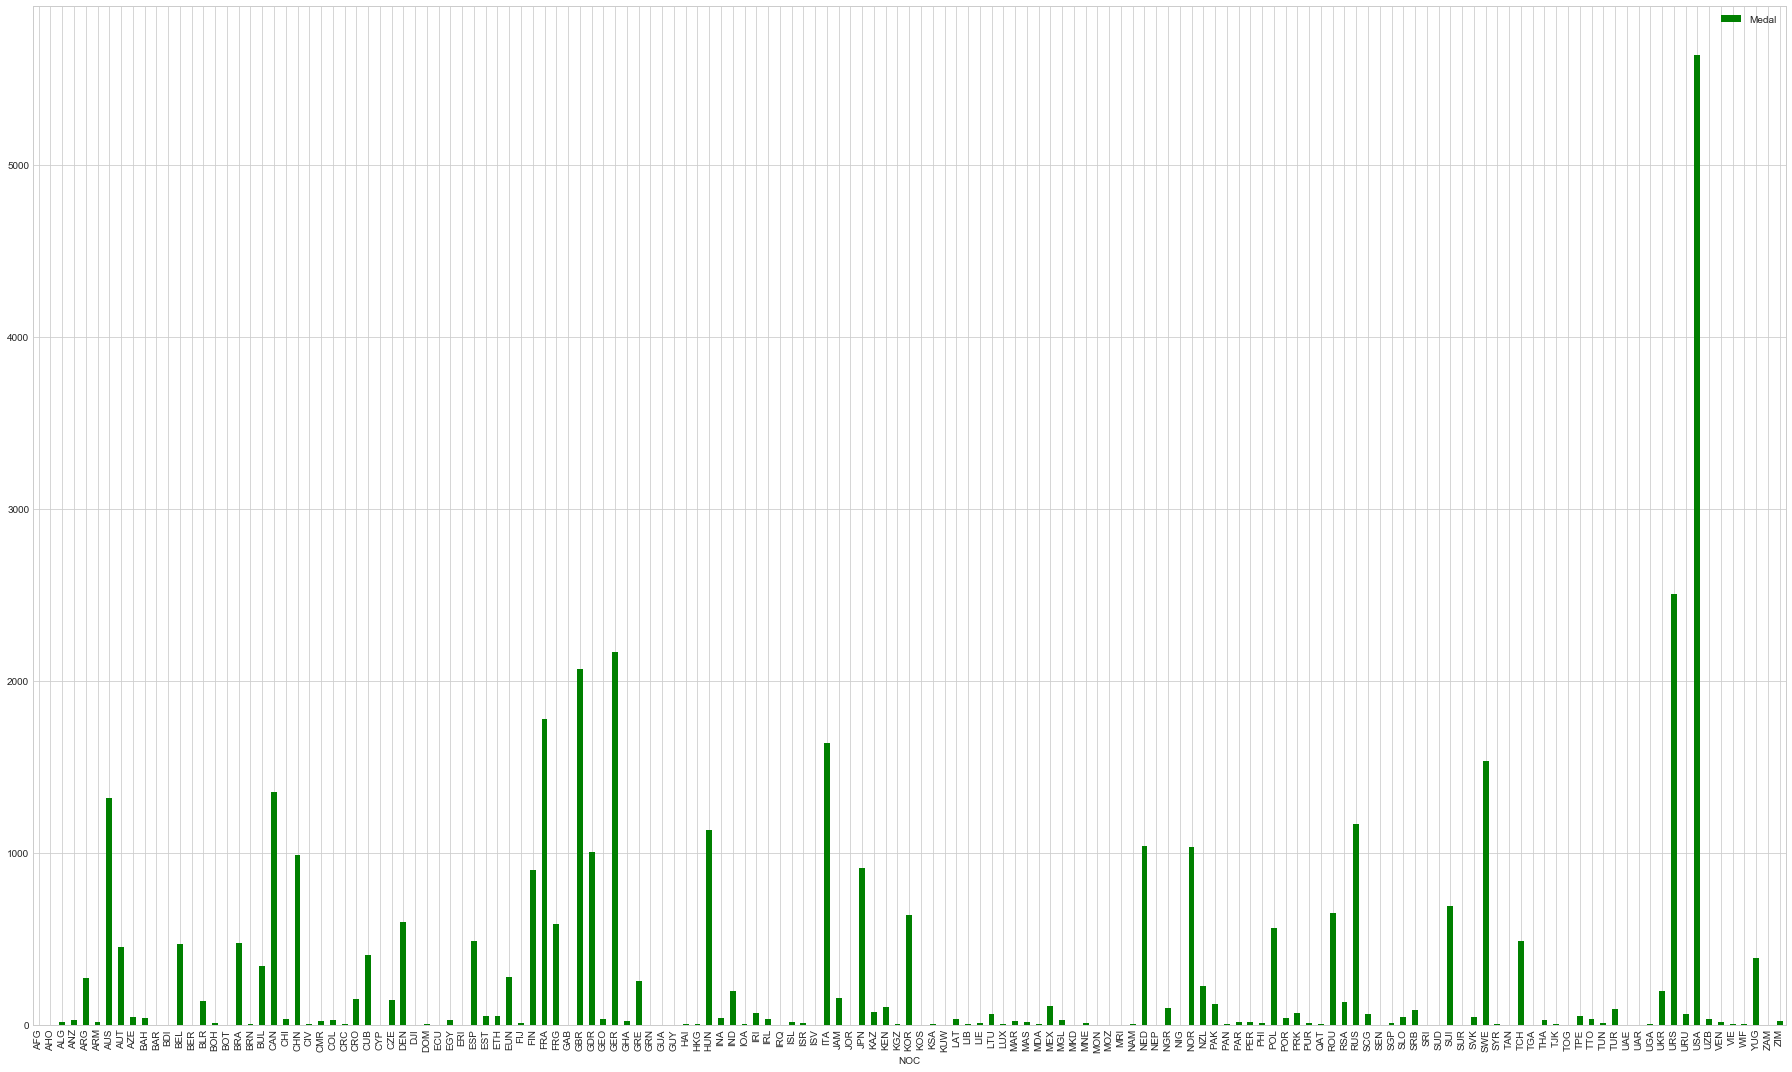

In [19]:
#Now let us check which country won the maxmium no of medals
Medal = data[data['Medal']!='Lost'].groupby('NOC')['Medal'].count()
medal = pd.DataFrame(data=Medal)
medal.reset_index(inplace=True)
medal.sort_values(by='Medal')
medal.plot(kind='bar',x='NOC',y='Medal',colors='green',figsize=(25,15))
plt.tight_layout()

WOW!! USA has the maximum no of medals,USA tops in every field whether it is technology,sports,defence etc then Ukraine then so on..Where is INDIA?? It can not be seen in x axis but if you zoom in near IOA you will be able to seen..INDIA (IND) it has won 197 medals in olympics till 2016..Not so bad comparing other country  like Namibia,Afganistan,Zimbabwe,etc.But one thing is that INDIA is ahead then PAKISTAN (PAK) which has 121 medals you can find PAK by zoom in near NZL.However at that time PAK and IND where same.But in reality INDIA has won 28 medals till now.

In [20]:
#Now let us check in which Sports India has won the Medals
India = data[(data['NOC']=='IND') & (data['Medal']!='Lost')]['Sport'].value_counts()

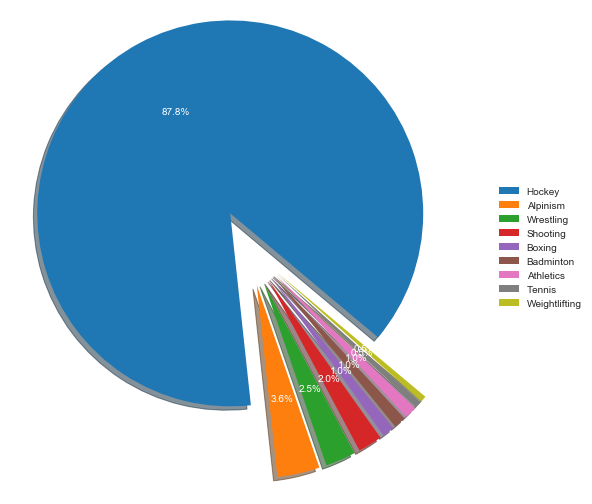

In [21]:
#India.iplot(kind='pie',labels='Sport',values='Medal',pull=.2,hole=.2,colorscale='RdBu',textposition='outside',textinfo='value')
India = pd.DataFrame(data=India)
plt.figure(figsize=(7,7))
plt.pie(x=India['Sport'],autopct='%1.1f%%',textprops=dict(color="w"),labels=India.index,shadow=True,startangle=320,explode=(0.2,0.2,0.2,0.2,0.2,0.2,.2,.2,.2))
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.tight_layout()

COOL!!In Hockey India has won maximum medals and minimum in tennis..

In [22]:
#NOW let us check which sports is most popular one
popular = data.groupby('Sport')['Medal'].count()
popular = pd.DataFrame(data=popular)
popular.rename(columns={'Medal':'Famous'},inplace=True)
popular.reset_index(inplace=True)

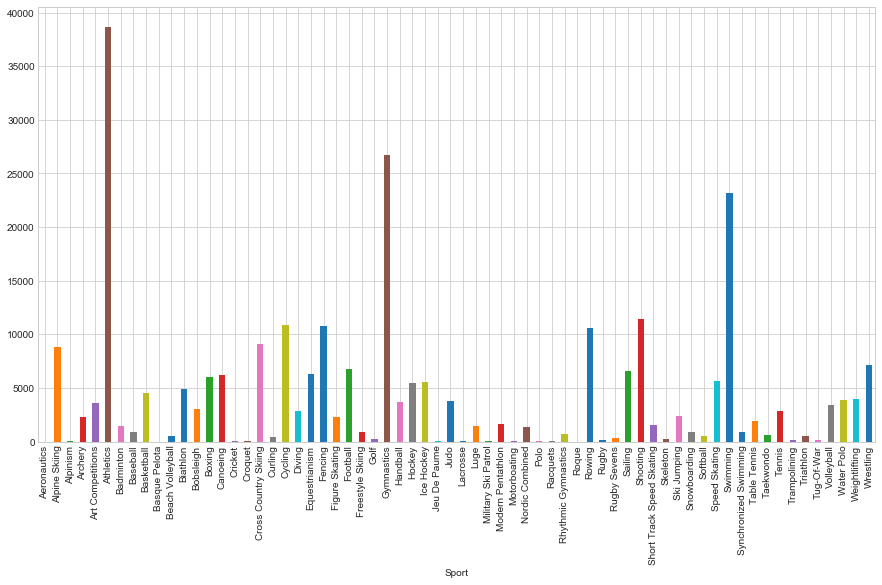

In [23]:
sns.set_style('whitegrid')
popular.plot.bar(x='Sport',y='Famous',figsize=(15,8),legend=False)

Awesome!! Athletics is the most popular one than Gymnastics than Swimming and soooooon on....

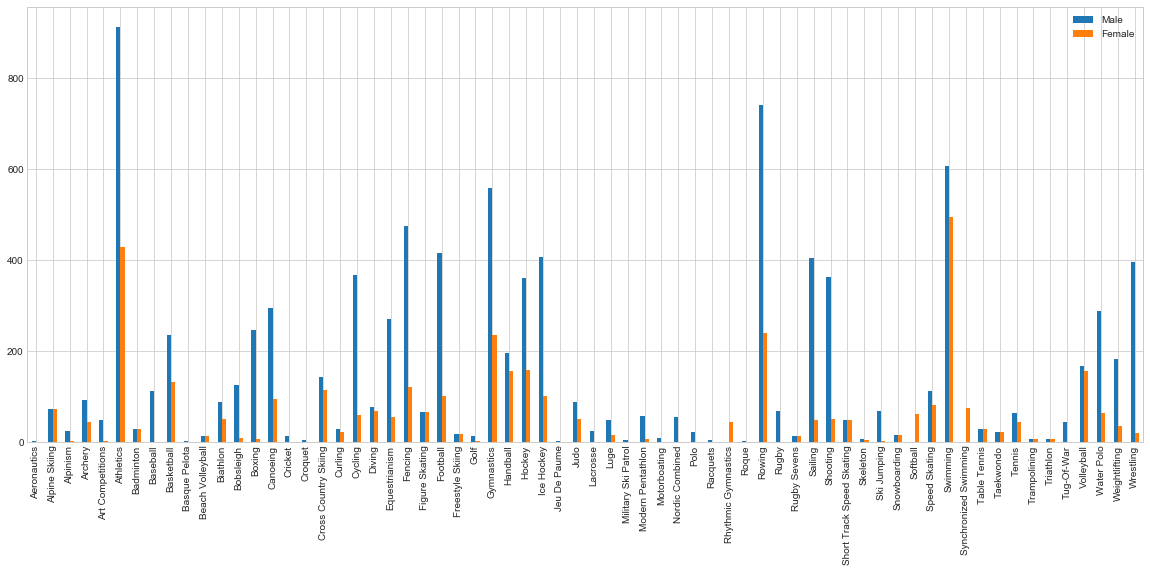

In [24]:
#Now let us check in which field Male had won Gold in comparision to Female
Male = data[(data['Sex']=='M') & (data['Medal']=='Gold')].groupby('Sport')['Medal'].count()
Female = data[(data['Sex']=='F') & (data['Medal']=='Gold')].groupby('Sport')['Sex'].count()
Male = pd.DataFrame(data=Male)
Female = pd.DataFrame(data=Female)
Comparison = pd.concat([Male,Female],axis=1)
Comparison.rename(columns={'Medal':'Male','Sex':'Female'},inplace=True)
Comparison['Male'] = Comparison['Male'].apply(lambda x: 0 if pd.isnull(x) else x)
Comparison['Female'] = Comparison['Female'].apply(lambda x: 0 if pd.isnull(x) else x)
Comparison.plot(kind='bar',figsize=(20,8))

It seems that male are head than female in mostly every field expect for Softball,Rhythmic Gymnastics and Synchronized Swimming

In [25]:
#NOW let us apply machine learnig algorithms to predict whether a sports person will win Gold,Silver,Bronze or will not win any
#of them in Olympics..;-D

In [26]:
#So we need to preprocess the data,Lets Do it!

In [27]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Lost
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Lost
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Lost
3,4,Edgar Lindenau Aabye,M,34.0,180.0,73.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Lost


In [28]:
#Let us remove useless features : I think Name is useless , we already have NOC So we will remove Team also,
#Games is useless and Event can also be removed...
data = data.drop(labels=['Name','Team','Games','Event'],axis=1)

In [29]:
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Lost
1,2,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Lost
2,3,M,24.0,180.0,73.0,DEN,1920,Summer,Antwerpen,Football,Lost
3,4,M,34.0,180.0,73.0,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,5,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Lost


In [30]:
#Now we all know that your machine learning algorithm can't deal with string So will try to convert it in numerical values

In [31]:
#now let us Change Sex Column 0 -> Male 1 -> Female
data['Sex'] = data['Sex'].apply(lambda x:0 if x=='M' else 1)

In [32]:
#Let us check once
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Lost
1,2,0,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Lost
2,3,0,24.0,180.0,73.0,DEN,1920,Summer,Antwerpen,Football,Lost
3,4,0,34.0,180.0,73.0,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,5,1,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Lost


In [33]:
#Now let us work for NOC Column here we can use Numerical value instead of Abbrevation of country 
my_list = list(data['NOC'].values)
my_set = {*my_list}
Country = list(my_set)#Unique Country
data['NOC'] = data['NOC'].apply(lambda x:Country.index(x))

In [34]:
#Checking..
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,88,1992,Summer,Barcelona,Basketball,Lost
1,2,0,23.0,170.0,60.0,88,2012,Summer,London,Judo,Lost
2,3,0,24.0,180.0,73.0,32,1920,Summer,Antwerpen,Football,Lost
3,4,0,34.0,180.0,73.0,32,1900,Summer,Paris,Tug-Of-War,Gold
4,5,1,21.0,185.0,82.0,182,1988,Winter,Calgary,Speed Skating,Lost


In [35]:
#Now Similarly for Sex we can do it for Season where Summer -> 0 and Winter -> 1
data['Season'] = data['Season'].apply(lambda x:0 if x=='Summer' else 1)

In [36]:
#Again Check..
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,88,1992,0,Barcelona,Basketball,Lost
1,2,0,23.0,170.0,60.0,88,2012,0,London,Judo,Lost
2,3,0,24.0,180.0,73.0,32,1920,0,Antwerpen,Football,Lost
3,4,0,34.0,180.0,73.0,32,1900,0,Paris,Tug-Of-War,Gold
4,5,1,21.0,185.0,82.0,182,1988,1,Calgary,Speed Skating,Lost


In [37]:
#Now City can also be an important factor.So,converting it in numerical value similar to NOC
my_list = list(data['City'].values)
my_set = {*my_list}
City = list(my_set) #Unique City 
data['City'] = data['City'].apply(lambda x:City.index(x))

In [38]:
#Check is quite important..
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,88,1992,0,9,Basketball,Lost
1,2,0,23.0,170.0,60.0,88,2012,0,21,Judo,Lost
2,3,0,24.0,180.0,73.0,32,1920,0,23,Football,Lost
3,4,0,34.0,180.0,73.0,32,1900,0,20,Tug-Of-War,Gold
4,5,1,21.0,185.0,82.0,182,1988,1,1,Speed Skating,Lost


In [39]:
#Now Similarily for Sport column.
my_list = list(data['Sport'].values)
my_set = {*my_list}
Sport = list(my_set)
data['Sport'] = data['Sport'].apply(lambda x:Sport.index(x))

In [40]:
#Check
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,88,1992,0,9,5,Lost
1,2,0,23.0,170.0,60.0,88,2012,0,21,20,Lost
2,3,0,24.0,180.0,73.0,32,1920,0,23,49,Lost
3,4,0,34.0,180.0,73.0,32,1900,0,20,52,Gold
4,5,1,21.0,185.0,82.0,182,1988,1,1,8,Lost


In [41]:
#Now similarly for Medal Lost -> 0 , Gold -> 1 , Silver -> 2 , Bronze -> 3
def Medal_conversion(medal):
    if medal=='Lost':
        medal=0
    if medal=='Gold':
        medal=1
    if medal=='Silver':
        medal=2
    if medal=='Bronze':
        medal=3
    return medal
data['Medal'] = data['Medal'].apply(Medal_conversion)

In [42]:
#Final 'CHECK' ;-P
data.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,0,24.0,180.0,80.0,88,1992,0,9,5,0
1,2,0,23.0,170.0,60.0,88,2012,0,21,20,0
2,3,0,24.0,180.0,73.0,32,1920,0,23,49,0
3,4,0,34.0,180.0,73.0,32,1900,0,20,52,1
4,5,1,21.0,185.0,82.0,182,1988,1,1,8,0


Yes!! We did it... Now the data it perfect to feed in for Machine learning Algorithms

In [43]:
#Let us Now seperate our label 'Medal' which has to be predicted from rest of the data.
X = data.drop(labels='Medal',axis=1)
y = data['Medal']

In [44]:
#Before feeding it to Machine learning algorithms let us Standardize it.That is Scaling..
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [45]:
scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
scaled = scale.transform(X)

In [47]:
X = pd.DataFrame(data=scaled,columns=X.columns)

In [48]:
#So, Scaling has been succesfull so,let us now Split the dataset for training and testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
#We have Successfully split the dataset...and as it is a Classification problem So , K-Nearest Neighbors Classifier first ;-)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
knn_pre = knn.predict(X_test)

In [51]:
#Now Lets measure the accuracy..
from sklearn import metrics
metrics.accuracy_score(y_test,knn_pre)

0.8457367676891867

Not bad Score! So,Lets apply Elbo method to find the right value of n_neighbors..and Lets see if accuracy can bee improved more.

In [52]:
#Now Trying elbo method to find right value K or N-neighbors
error_rate = []
#As 5 is default value of n_neighbors starting from 6.. B-)
for i in range(6,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pre_i = knn.predict(X_test)
    print('Value for {} it has been predicted..'.format(i))
    error_rate.append(np.mean(pre_i != y_test))

Value for 6 it has been predicted..
Value for 7 it has been predicted..
Value for 8 it has been predicted..
Value for 9 it has been predicted..
Value for 10 it has been predicted..
Value for 11 it has been predicted..
Value for 12 it has been predicted..
Value for 13 it has been predicted..
Value for 14 it has been predicted..
Value for 15 it has been predicted..
Value for 16 it has been predicted..
Value for 17 it has been predicted..
Value for 18 it has been predicted..
Value for 19 it has been predicted..


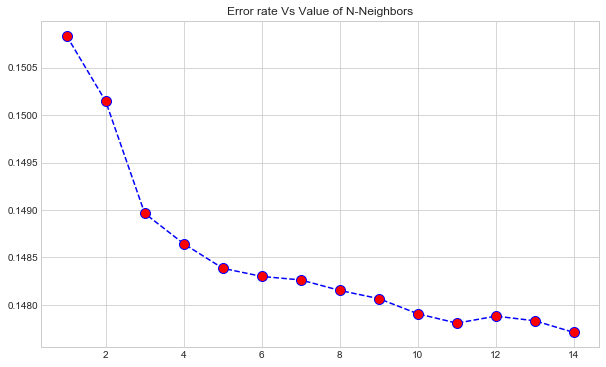

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs Value of N-Neighbors')
plt.xlabel='K Values or N-Neighbors'
plt.ylabel='Error rate'

In [54]:
#OKAY we got n_neighbours mean value as 14.Lets put and seen if our accuracy increased or not...
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)

In [55]:
#Now Lets measure the accuracy..
metrics.accuracy_score(y_test,knn_pre)

0.85193336202127

It seems that there is some improvement...;-D

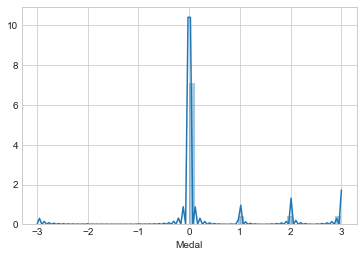

In [56]:
#Let us also check it graphically..  B-D
sns.distplot(y_test-knn_pre)

In [57]:
#Now let us try Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
dtc_pre = dtc.predict(X_test)

In [59]:
#Now Lets measure the accuracy..
metrics.accuracy_score(y_test,dtc_pre)

0.8399827872379665

Okay..Dude note Accuracy decreased ... :-(

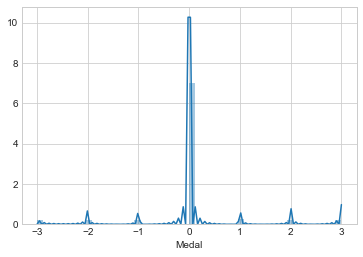

In [60]:
#Let us also check it graphically..  B-D
sns.distplot(y_test-dtc_pre)

In [61]:
#Now Lets apply Random Forest Classifier and Check...I hope we get improved result.
from sklearn.ensemble import RandomForestClassifier
obj = RandomForestClassifier()
obj.fit(X_train,y_train)

C:\Users\kiit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rfc_pre = obj.predict(X_test)

In [63]:
#Now Lets measure the accuracy..
metrics.accuracy_score(y_test,rfc_pre)

0.8563103215098051

A bit better than KNN final result and far better than Decision Tree

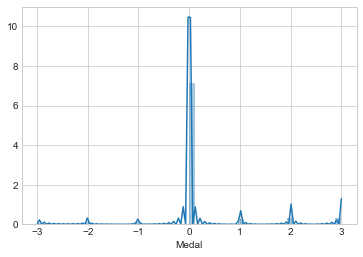

In [64]:
#Let us also check it graphically..  B-D
sns.distplot(y_test-rfc_pre)

At last.. let us tune the parameters of Random Forest Classifier via Grid Search.. X-D

In [65]:
#Now let us apply GridSearchCV to find the write n_estimators and max_features
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[15,20,30],'max_features':[5,9,'log2']} 
gs = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,verbose=3)
gs.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_features=5, n_estimators=15 .................................
[CV]  max_features=5, n_estimators=15, score=0.8637728810344283, total=   9.3s
[CV] max_features=5, n_estimators=15 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV]  max_features=5, n_estimators=15, score=0.8651122352197281, total=   9.2s
[CV] max_features=5, n_estimators=15 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s


[CV]  max_features=5, n_estimators=15, score=0.86395611691617, total=  10.6s
[CV] max_features=5, n_estimators=20 .................................
[CV]  max_features=5, n_estimators=20, score=0.8652903796908097, total=  13.7s
[CV] max_features=5, n_estimators=20 .................................
[CV]  max_features=5, n_estimators=20, score=0.8650806196648752, total=  12.6s
[CV] max_features=5, n_estimators=20 .................................
[CV]  max_features=5, n_estimators=20, score=0.8655369196477971, total=  12.6s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, score=0.8659068635199646, total=  23.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, score=0.8663294340815682, total=  19.4s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, score=0.8672125705433219, total=  19.1s
[CV] max_features=9, n_

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 20, 30], 'max_features': [5, 9, 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [66]:
#Now these are the best parameter in DRF()..
gs.best_params_

{'max_features': 9, 'n_estimators': 30}

In [67]:
rfc = gs.predict(X_test)

In [68]:
#Now Lets measure the accuracy..
metrics.accuracy_score(y_test,rfc)*100

87.13714882891745

Finally we got a Very GOOD result....87.13 better than all above accuracy..

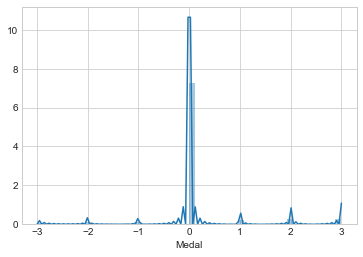

In [69]:
#Let us also check it graphically..  B-D
sns.distplot(y_test-rfc)

We did well..So cheers and enjoy !!  ;-)